# Football Data Analysis
Football is a global, popular, and dynamic sport with many different factors that can influence the outcome of a match. By analyzing large datasets of football data, teams can gain a deeper understanding of factors that contribute to players' success, enabling coaches, scouts, and analysts to make informed decisions.

Football data analysis is the process of collecting, cleaning, and analyzing data to extract meaningful insights. The valuable insights extracted from this analysis can be used to improve player performance, team tactics, fan engagement, and overall decision-making.

# Sprint 4:
- Performance Analysis: Finding solutions to business questions related to Logistic Regression for Classification.
- Player Profile and Market Value: Performing descriptive analysis using various data analysis and visualization techniques.
- Writing interpretation for each analysis individually.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('football_data.csv')
data.head()

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman


In [10]:
from datetime import datetime

# Convert the actual DOB column to datetime format
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors='coerce')

# Calculate the current year
current_year = datetime.now().year

# Calculate the age
data['age'] = current_year - data['date_of_birth'].dt.year

--------------------------------------------------------------------------------------------------------------------------------------------------------
# Logistic Regression for Classification
## Can we classify whether a player is likely to score a goal based on their playing time, assists, and yellow cards?

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data['goal_scored'] = (data['goals'] > 0).astype(int)  # Binary target variable (1 = scored, 0 = not scored)
features = data[['minutes_played', 'assists', 'yellow_cards']]
target = data['goal_scored']

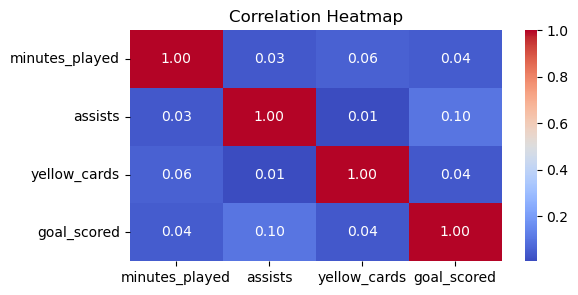

In [37]:
correlation_matrix = data[['minutes_played', 'assists', 'yellow_cards', 'goal_scored']].corr()
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [39]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Scale features

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

In [41]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9069696039299969


In [47]:
y_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9062276306370795


In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1266    0]
 [ 131    0]]


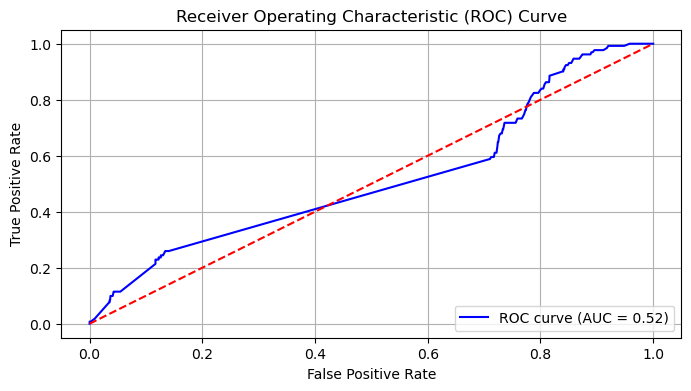

In [49]:
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Interpretation:
-  The confusion matrix shows the true positives, false positives, true negatives,  false negatives.
-  Training Accuracy: 0.91 and Testing Accuracy: 0.90
- The ROC curve indicates that the model's performance (AUC = 0.52) is only slightly better than random guessing.
- To improve, consider adding more predictive features or addressing potential class imbalance.

--------------------------------------------------------------------------------------------------------------------------------------------------------
# Descriptive Analysis
## What is the distribution of players' market values?

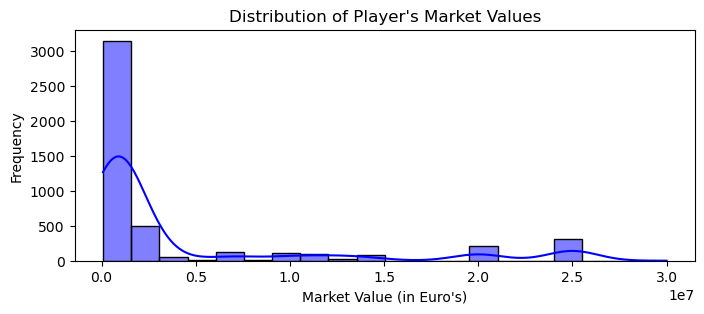

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,3))
sns.histplot(data['market_value_in_eur'], bins=20, kde=True, color='blue')
plt.title("Distribution of Player's Market Values")
plt.xlabel("Market Value (in Euro's)")
plt.ylabel("Frequency")
plt.show()

### Interpretation:
- This analysis shows the spread of market values among players.
- Skewness or clustering in the data may indicate outliers or groups of players with similar market values.

## What are the average market values of players by position?

In [9]:
# Group data by position and calculate average market value
avg_market_value_by_position = data.groupby('position_x')['market_value_in_eur'].mean().sort_values(ascending=False)
print("Average Market Value by Position:\n", avg_market_value_by_position)

Average Market Value by Position:
 position_x
Attacking Midfield    1.913333e+07
Right Winger          1.398485e+07
Right Midfield        1.369545e+07
Left-Back             8.475000e+06
Central Midfield      6.947368e+06
Right-Back            4.927273e+06
Centre-Back           4.190246e+06
Centre-Forward        4.105000e+06
Left Winger           3.387500e+06
Defensive Midfield    2.257143e+06
Goalkeeper            1.500000e+06
Name: market_value_in_eur, dtype: float64


### Interpretation:
- Highlights positions with the highest average market values (e.g., forwards or midfielders).
- Useful for comparing the financial importance of different roles on the field.

## What is the correlation between player height and market value?

In [17]:
# Calculate correlation
correlation = data['height_in_cm'].corr(data['market_value_in_eur'])
print(f"Correlation between height and market value: {correlation:.2f}")

Correlation between height and market value: -0.20


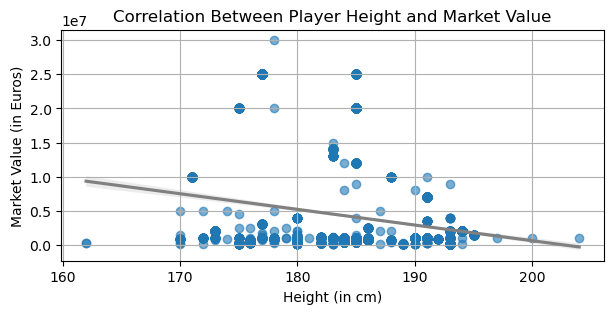

In [24]:
plt.figure(figsize=(7, 3))# Scatter plot with regression line
sns.regplot(x='height_in_cm', y='market_value_in_eur', data=data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'grey'})
plt.title('Correlation Between Player Height and Market Value')
plt.xlabel('Height (in cm)')
plt.ylabel('Market Value (in Euros)')
plt.grid(True)
plt.show()

### Interpretation:
- As height increases, the market value of players generally decreases.
- Taller players generally have lower market values, likely due to positional differences, emphasizing skill over physical traits in higher-valued roles.

--------------------------------------------------------------------------------------------------------------------------------------------------------
# Random Forest For Regression
## Can we predict a player's market value based on their performance metrics and attributes?

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Handle missing values (drop or fill)
data = data.dropna(subset=['market_value_in_eur'])

# Feature Selection: Select relevant columns
features = ['goals', 'assists', 'minutes_played', 'age', 'position_y']
X = data[features]

# Target Variable
y = data['market_value_in_eur']

# Convert categorical data to numeric (if any)
X = pd.get_dummies(X, drop_first=True)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 6045556408141.899
R² Score: 0.881430090667914


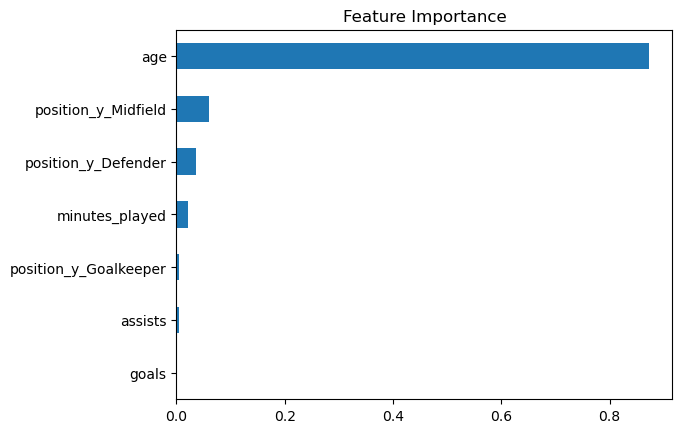

In [35]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

### Interpretation:
- R² Score close to 1 indicates a strong predictive model.
- Analyze feature importance to see which attributes affect market value the most.